In [21]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv("data/mouse_drug_data.csv")
clinical_trial_data = pd.read_csv("data/clinicaltrial_data.csv")


# Combine the data into a single dataset
combined_data = pd.merge(mouse_drug_data, clinical_trial_data , on="Mouse ID", how = "left")


# Display the data table for preview
combined_data.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
Group_data = combined_data.groupby(["Drug", "Timepoint"])
Mean_Tumor_Data = Group_data["Tumor Volume (mm3)"].mean()
Mean_Tumor_Data
# Convert to DataFrame
Tumor_response_data = pd.DataFrame(Mean_Tumor_Data).reset_index()

# Preview DataFrame
Tumor_response_data.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

Mean_Tumor_Data_error = Group_data["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
Tumor_response_data_error = pd.DataFrame(Mean_Tumor_Data_error).reset_index()

# Preview DataFrame
Tumor_response_data_error.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames

Mungled_Data = Tumor_response_data.pivot(index = 'Timepoint', columns ='Drug', values = 'Tumor Volume (mm3)') 
#Mungled_Data = Tumor_response_data.set_index('Timepoint', 'Drug', 'Tumor Volume (mm3)') 
# Preview that Reformatting worked
Mungled_Data

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


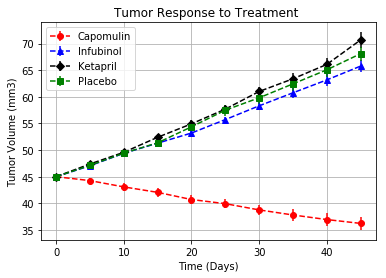

In [22]:
# Generate the Plot (with Error Bars)
Capomulin_error = Tumor_response_data_error.loc[Tumor_response_data_error["Drug"] == "Capomulin", "Tumor Volume (mm3)"]
Infubinol_error = Tumor_response_data_error.loc[Tumor_response_data_error["Drug"] == "Infubinol", "Tumor Volume (mm3)"]
Ketapril_error = Tumor_response_data_error.loc[Tumor_response_data_error["Drug"] == "Ketapril", "Tumor Volume (mm3)"]
Placebo_error = Tumor_response_data_error.loc[Tumor_response_data_error["Drug"] == "Placebo", "Tumor Volume (mm3)"]
Time = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
plt.errorbar(Time, Mungled_Data["Capomulin"] , yerr= Capomulin_error, label= "Capomulin", marker= "o", color="red", linestyle='--')
plt.errorbar(Time, Mungled_Data["Infubinol"] , yerr= Infubinol_error, label= "Infubinol", marker= "^", color="blue", linestyle='--')
plt.errorbar(Time, Mungled_Data["Ketapril"] , yerr= Ketapril_error, label= "Ketapril", marker= "D", color="black", linestyle='--')
plt.errorbar(Time, Mungled_Data["Placebo"] , yerr= Placebo_error , label= "Placebo", marker= "s", color="green", linestyle='--')
plt.legend()
plt.title("Tumor Response to Treatment ")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
plt.show()

# Save the Figure

# Show the Figure
plt.show()

Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
Group_data = combined_data.groupby(["Drug", "Timepoint"])
Mean_Metsite_Data = Group_data["Metastatic Sites"].mean()
# Convert to DataFrame
Metsite_response_data = pd.DataFrame(Mean_Metsite_Data).reset_index()
# Preview DataFrame
Metsite_response_data.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
Mean_Metsite_Data_error = Group_data["Metastatic Sites"].sem()

# Convert to DataFrame
Metsite_data_error = pd.DataFrame(Mean_Metsite_Data_error).reset_index()
# Preview DataFrame
Metsite_data_error.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [8]:
# Minor Data Munging to Re-Format the Data Frames
Mungled_Data_Metsite = Metsite_response_data.pivot(index = 'Timepoint', columns ='Drug', values = 'Metastatic Sites')

# Preview that Reformatting worked
Mungled_Data_Metsite.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


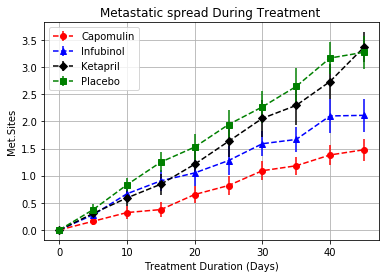

In [9]:
# Generate the Plot (with Error Bars)
Capomulin_error = Metsite_data_error.loc[Metsite_data_error["Drug"] == "Capomulin", "Metastatic Sites"]
Infubinol_error = Metsite_data_error.loc[Metsite_data_error["Drug"] == "Infubinol", "Metastatic Sites"]
Ketapril_error = Metsite_data_error.loc[Metsite_data_error["Drug"] == "Ketapril", "Metastatic Sites"]
Placebo_error = Metsite_data_error.loc[Metsite_data_error["Drug"] == "Placebo", "Metastatic Sites"]
Time = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
plt.errorbar(Time, Mungled_Data_Metsite["Capomulin"] , yerr= Capomulin_error, label= "Capomulin", marker= "o", color="red", linestyle='--')
plt.errorbar(Time, Mungled_Data_Metsite["Infubinol"] , yerr= Infubinol_error, label= "Infubinol", marker= "^", color="blue", linestyle='--')
plt.errorbar(Time, Mungled_Data_Metsite["Ketapril"] , yerr= Ketapril_error, label= "Ketapril", marker= "D", color="black", linestyle='--')
plt.errorbar(Time, Mungled_Data_Metsite["Placebo"] , yerr= Placebo_error, label= "Placebo", marker= "s", color="green", linestyle='--')
plt.legend()
plt.title("Metastatic spread During Treatment ")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met.Sites")
plt.grid()

# Show the Figure
plt.show()


# Save the Figure

Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
Group_data = combined_data.groupby(["Drug", "Timepoint"])
Count_Mice_Data = Group_data["Mouse ID"].count()

# Convert to DataFrame
Mice_data = pd.DataFrame(Count_Mice_Data).reset_index()

# renaming the column name Mouse ID to Mouse Count 
renamed_Mice_data = Mice_data.rename(columns={"Mouse ID": "Mouse Count"})

# Preview DataFrame
renamed_Mice_data.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [12]:
# Minor Data Munging to Re-Format the Data Frames
Mungled_Mice_data = Mice_data.pivot(index = 'Timepoint', columns ='Drug', values = 'Mouse ID')
# Preview the Data Frame
Mungled_Mice_data

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


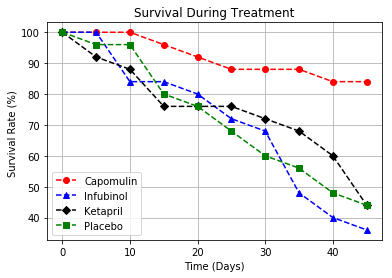

In [13]:
# Generate the Plot (Accounting for percentages)

Time = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
plt.plot(Time, (Mungled_Mice_data["Capomulin"]/25)*100 , label= "Capomulin", marker= "o", color="red", linestyle='--')
plt.plot(Time, (Mungled_Mice_data["Infubinol"]/25)*100 , label= "Infubinol", marker= "^", color="blue", linestyle='--')
plt.plot(Time, (Mungled_Mice_data["Ketapril"]/25)*100 , label= "Ketapril", marker= "D", color="black", linestyle='--')
plt.plot(Time, (Mungled_Mice_data["Placebo"]/25)*100 , label= "Placebo", marker= "s", color="green", linestyle='--')
plt.legend()
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%) ")
plt.grid()
plt.show()


# Save the Figure

# Show the Figure
plt.show()

Summary Bar Graph

In [15]:
# Calculate the percent changes for each drug
Intial_tumor_volume = 45
Percent_Change = ((Mungled_Data.loc[45, :] - Intial_tumor_volume)/Intial_tumor_volume)*100

# Display the data to confirm
Percent_Change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
Name: 45, dtype: float64

In [16]:
# Store all Relevant Percent Changes into a Tuple
tuple_Percent_Change = tuple(zip(Percent_Change.index, Percent_Change))
tuple_Percent_Change_list = list(tuple_Percent_Change)
tuple_Percent_Change_list

[('Capomulin', -19.475302667894173),
 ('Ceftamin', 42.51649185589744),
 ('Infubinol', 46.12347172785187),
 ('Ketapril', 57.028794686606076),
 ('Naftisol', 53.92334713476923),
 ('Placebo', 51.29796048315153),
 ('Propriva', 47.24117486320637),
 ('Ramicane', -22.320900462766673),
 ('Stelasyn', 52.085134287899024),
 ('Zoniferol', 46.57975086509525)]

In [17]:
# Splice the data between passing and failing drugs
passing_drugs_list = []
failing_drugs_list = []
index_passing_drugs_list = []
index_failing_drugs_list = []
for j,elements in tuple_Percent_Change_list :
    if elements > 0 :
        passing_drug = elements
        passing_drugs_list.append(elements)
        index_passing_drugs_list.append(j)
    else :
        failing_drugs = elements
        failing_drugs_list.append(elements)
        index_failing_drugs_list.append(j)
passing_drugs = list(zip(index_passing_drugs_list, passing_drugs_list))
failing_drugs = list(zip(index_failing_drugs_list, failing_drugs_list))

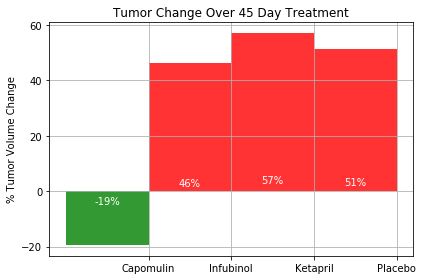

In [19]:
# Orient widths. Add labels, tick marks, etc. 

fig, ax = plt.subplots()
y_value1 = [Percent_Change["Infubinol"], Percent_Change["Ketapril"], Percent_Change["Placebo"]]
x_axis1 = [0]
x_axis2 = [1, 2, 3]


bars1 = ax.bar(x_axis1, Percent_Change["Capomulin"], color='g', alpha=0.8, align="edge", width = -1)
bars2 = ax.bar(x_axis2, y_value1 , color='r', alpha=0.8, align="edge", width = -1)
x_labels = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]

plt.setp(ax, xticks=[0, 1, 2, 3], xticklabels=["Capomulin", "Infubinol", "Ketapril", "Placebo"],
        yticks=[-20, 0, 20, 40, 60])
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.grid()

# Use functions to label the percentages of changes
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, .1*height, "%d" %int(height)+ "%",
                ha='center', va='top', color="white")

# Call functions to implement the function calls     
autolabel(bars1)
autolabel(bars2)

# Save the Figure

# Show the Figure
fig.tight_layout()
fig.show()